# Trainee IEEE - primeiro período

## Introdução

    Esse notebook tem como objetivo realizar as atividades propostas no primeiro período do trainee do IEEE de 2023.
    Para isso o Data set escolhido foi o "Sentiment & Emotions Labelled Tweets": https://www.kaggle.com/datasets/ankitkumar2635/sentiment-and-emotions-of-tweets

### Importação de bibliotecas e Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import preprocessing

In [2]:
base_original = pd.read_csv(r'C:\Users\rapha\OneDrive\Documentos\Programação + Cursos\IEEE\sentiment-emotion-labelled_Dell_tweets.csv', index_col=0)

In [3]:
base_original

,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...,...,...
24965,2022-01-01 02:02:04+00:00,1477097760931336198,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,Eodart,negative,0.682981,anger,0.906309
24966,2022-01-01 01:57:34+00:00,1477096631300415496,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701
24967,2022-01-01 01:36:36+00:00,1477091355629432833,Hey @JoshTheFixer here it is....27 4K UHD USB-...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,2022-01-01 01:31:30+00:00,1477090070830141442,@bravadogaming @thewolfpena @Alienware @intel ...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [4]:
base_original.describe()

,Tweet Id,sentiment_score,emotion_score
count,2.497000e+04,24970.000000,24970.000000
mean,1.526448e+18,0.782578,0.819114
std,2.765398e+16,0.150751,0.195378
min,1.477082e+18,0.337307,0.125480
25%,1.503808e+18,0.664537,0.722941
50%,1.524811e+18,0.817950,0.906610
75%,1.550124e+18,0.912815,0.970360
max,1.575991e+18,0.991532,0.994312


In [5]:
base_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24970 entries, 0 to 24969
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Datetime         24970 non-null  object 
 1   Tweet Id         24970 non-null  int64  
 2   Text             24970 non-null  object 
 3   Username         24970 non-null  object 
 4   sentiment        24970 non-null  object 
 5   sentiment_score  24970 non-null  float64
 6   emotion          24970 non-null  object 
 7   emotion_score    24970 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.7+ MB


### Análise exploratória

In [6]:
df = base_original.copy()

In [7]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

In [8]:
df['Tweet Id'].duplicated().sum()

0

In [9]:
sentiment = df.groupby('sentiment')['sentiment'].count()
sentiment

sentiment
negative    10556
neutral      7048
positive     7366
Name: sentiment, dtype: int64

<Axes: title={'center': 'Sentiment count'}, xlabel='sentiment', ylabel='Count'>

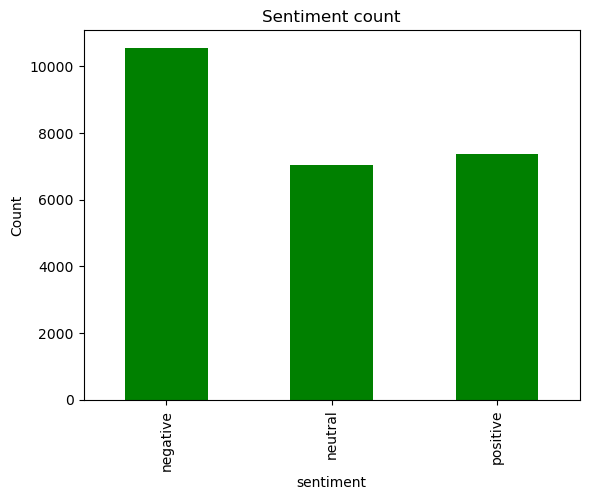

In [10]:
sentiment.plot(kind = 'bar', ylabel = 'Count', title = 'Sentiment count', color = 'Green')

<Axes: title={'center': 'Sentiment score mean'}, xlabel='sentiment', ylabel='Mean'>

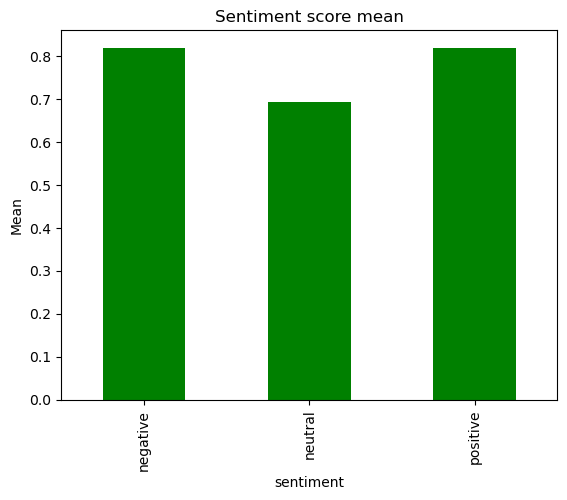

In [11]:
df.groupby('sentiment')['sentiment_score'].mean().plot(kind = 'bar', title = 'Sentiment score mean', ylabel = 'Mean', color = 'Green')

In [12]:
negative_emotions_count = df[df['sentiment'] == 'negative'].groupby('emotion')['emotion'].count()

In [13]:
neutral_emotions_count = df[df['sentiment'] == 'neutral'].groupby('emotion')['emotion'].count()

In [14]:
positive_emotions_count = df[df['sentiment'] == 'positive'].groupby('emotion')['emotion'].count()

Text(0.5, 1.0, 'Emotions count by sentiment')

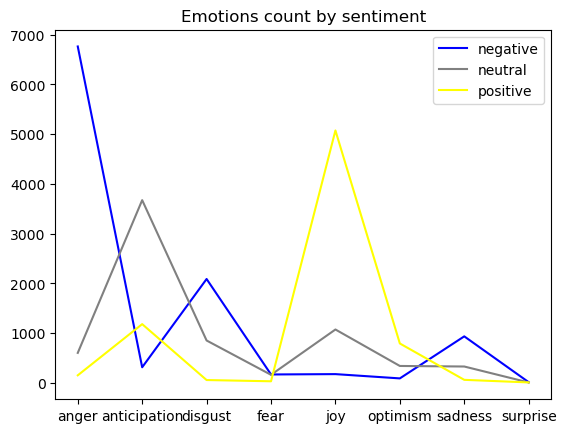

In [15]:
plt.plot(negative_emotions_count, color = 'blue', label = 'negative')
plt.plot(neutral_emotions_count, color = 'gray', label = 'neutral')
plt.plot(positive_emotions_count, color = 'yellow', label = 'positive')

plt.legend()
plt.title('Emotions count by sentiment')

In [16]:
negative_emotions_score_mean = df[df['sentiment'] == 'negative'].groupby('emotion')['emotion_score'].mean()
neutral_emotions_score_mean = df[df['sentiment'] == 'neutral'].groupby('emotion')['emotion_score'].mean()
positive_emotions_score_mean = df[df['sentiment'] == 'positive'].groupby('emotion')['emotion_score'].mean()

Text(0.5, 1.0, 'Emotions score mean by sentiment')

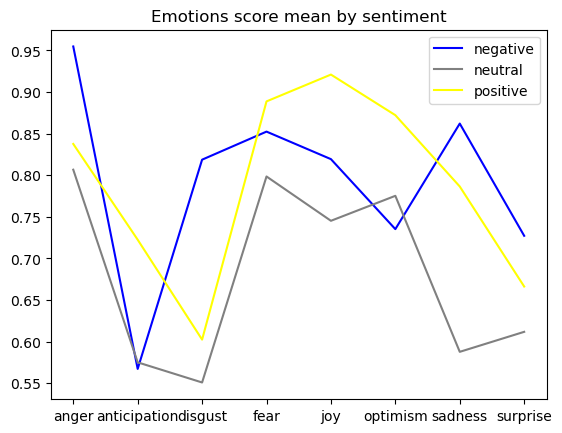

In [17]:
plt.plot(negative_emotions_score_mean, color = 'blue', label = 'negative')
plt.plot(neutral_emotions_score_mean, color = 'gray', label = 'neutral')
plt.plot(positive_emotions_score_mean, color = 'yellow', label = 'positive')

plt.legend()
plt.title('Emotions score mean by sentiment')

### Pré-processamento

In [18]:
dum_df = pd.get_dummies(df, columns=["emotion"], prefix=["Emotion_type"])

In [19]:
label_encoder = preprocessing.LabelEncoder()
dum_df['sentiment_code'] = label_encoder.fit_transform(dum_df['sentiment']) 

### Regressão dos dados

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [21]:
X = dum_df.iloc[:, 5:15]
y = dum_df.iloc[:, -1]
logreg_clf = LogisticRegression(max_iter=200)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
logreg_clf.fit(X_train, y_train)
logreg_prediction = logreg_clf.predict(X_test)
accuracy_score(logreg_prediction, y_test)

0.8060339073554933

In [37]:
confusion_matrix(logreg_prediction, y_test)

array([[2880,  346,   84],
       [ 215, 1389,  328],
       [  60,  420, 1769]], dtype=int64)

In [38]:
classification_report(logreg_prediction, y_test)

'              precision    recall  f1-score   support\n\n           0       0.91      0.87      0.89      3310\n           1       0.64      0.72      0.68      1932\n           2       0.81      0.79      0.80      2249\n\n    accuracy                           0.81      7491\n   macro avg       0.79      0.79      0.79      7491\nweighted avg       0.81      0.81      0.81      7491\n'

In [23]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
XKNN = dum_df.iloc[:, 5:7]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
accuracy_score(KNN_prediction, y_test)

0.8099052195968496

In [33]:
confusion_matrix(KNN_prediction, y_test)

array([[2824,  294,   70],
       [ 313, 1525,  409],
       [  47,  291, 1718]], dtype=int64)

In [34]:
classification_report(KNN_prediction, y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89      3188\n           1       0.72      0.68      0.70      2247\n           2       0.78      0.84      0.81      2056\n\n    accuracy                           0.81      7491\n   macro avg       0.80      0.80      0.80      7491\nweighted avg       0.81      0.81      0.81      7491\n'

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 10, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train)
clf_entropy_prediction = clf_entropy.predict(X_test)
accuracy_score(clf_entropy_prediction, y_test)

0.8143105059404618